# 生成普通RGB图片，用于制作mask

In [1]:
import spectral
from spectral import imshow
import torch
import os
import numpy as np
from PIL import Image

In [2]:
included_extensions = ['hdr']
data_dir = 'D:\\近红外部分\\spectral_data'

hdr_files = [fn for fn in os.listdir(data_dir) if any(fn.endswith(ext) for ext in included_extensions)]

In [3]:
for i in hdr_files:
    img = spectral.envi.open(data_dir+"/"+i)
    view = imshow(img)
    Image.fromarray(np.uint8(view.data_rgb*255)).save(data_dir+"/"+i+"_mask.png", "PNG") # 还他妈得乘回255


c:\ProgramData\Miniconda3\envs\VC\lib\site-packages\spectral\io\envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


# 看看用多大的窗口取平均效果比较好

In [ ]:
import spectral
import torch
import seaborn as sns
import ast
from spectral import imshow
from matplotlib.pyplot import MultipleLocator
import matplotlib.pyplot as plt

In [ ]:
img.shape # 行 列 通道

(1900, 900, 300)

In [ ]:
ast.literal_eval(img.metadata['gt_tfe'])

[29.07, 27.12, 31.25]

In [ ]:
imshow(img)

In [ ]:
img = spectral.envi.open("D:\\new\\9-Radiance From Raw Data-Reflectance from Radiance Data and Measured Reference Spectrum.bip.hdr")
img_data = torch.Tensor(img.asarray()/6000)

c:\ProgramData\Miniconda3\envs\VC\lib\site-packages\spectral\io\envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


In [ ]:
x = img_data[750-5:750+5, 500-5:500+5,:].mean(dim=(0,1))
DI = x.unsqueeze(0)-x.unsqueeze(1)  # [batch, 304, 304]
NDI = (x.unsqueeze(0)-x.unsqueeze(1))/(x.unsqueeze(0)+x.unsqueeze(1)+1e-5)

In [ ]:
DI.shape

torch.Size([300, 300])

<AxesSubplot:>

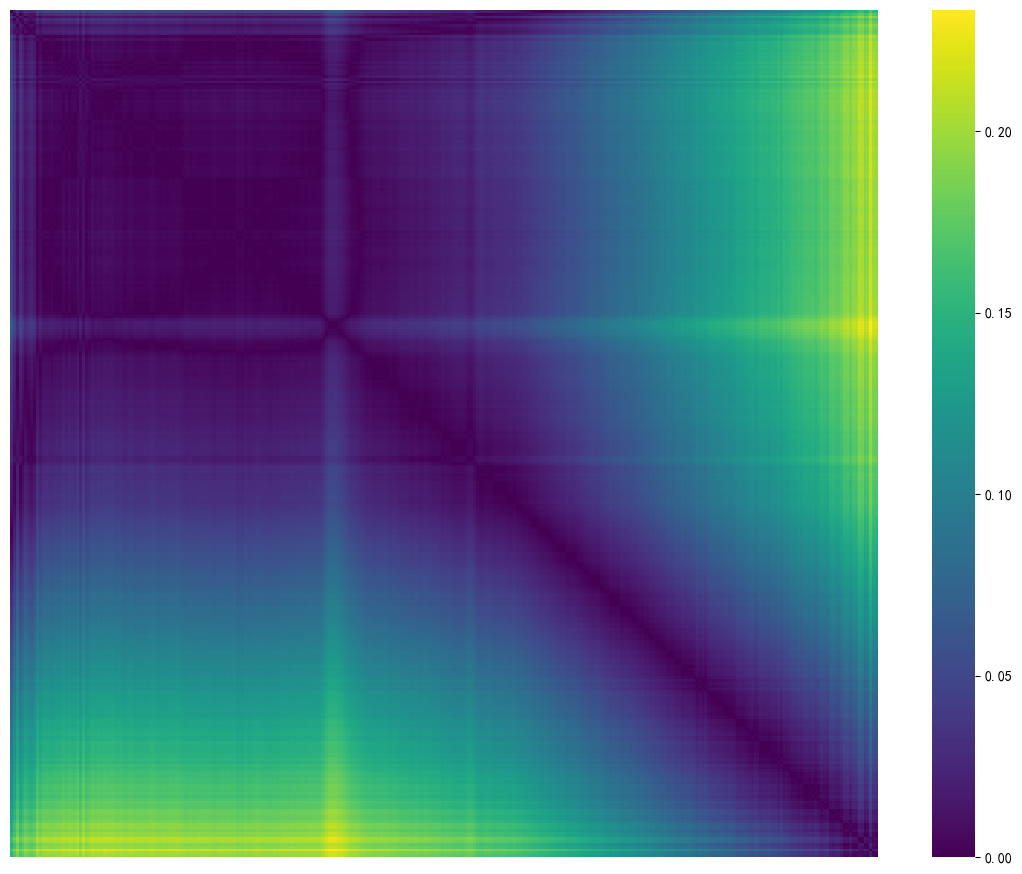

In [ ]:
sns.heatmap(torch.abs(NDI).numpy(), cmap="viridis", xticklabels=False, yticklabels=False)

<AxesSubplot:>

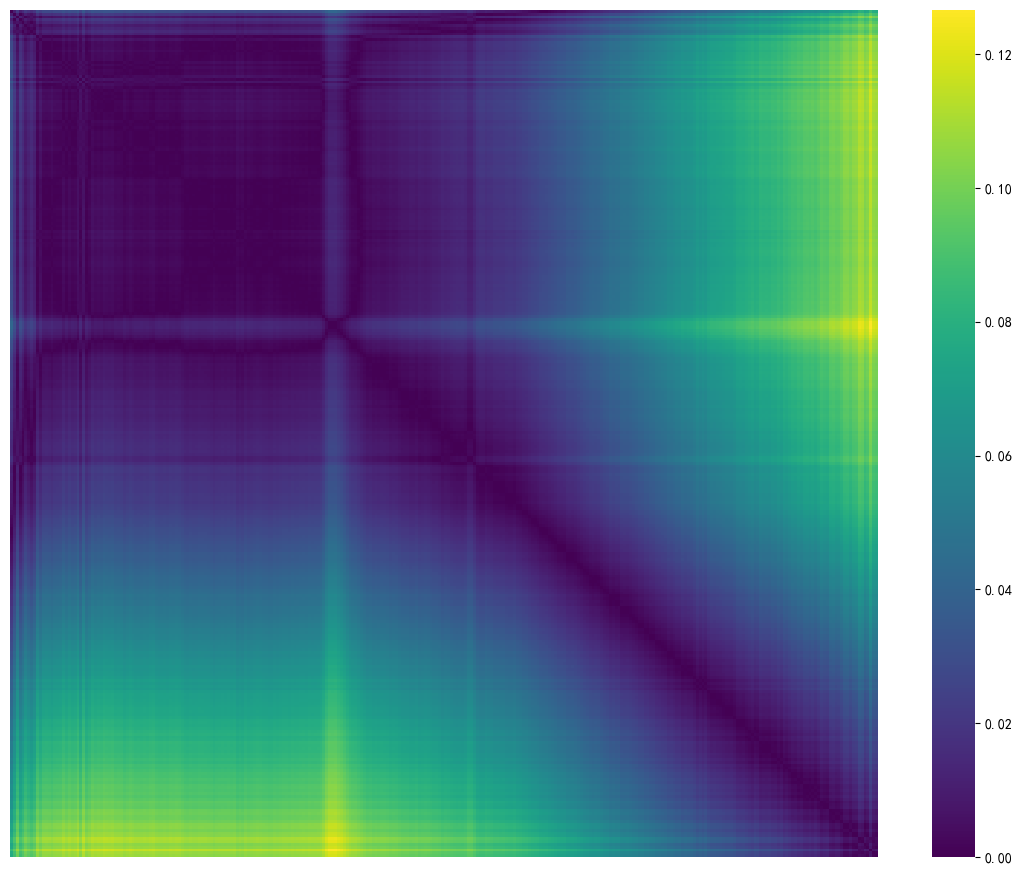

In [ ]:
plt.rcParams['figure.figsize'] = 14,11
sns.heatmap(torch.abs(DI).numpy(), cmap="viridis", xticklabels=False, yticklabels=False)

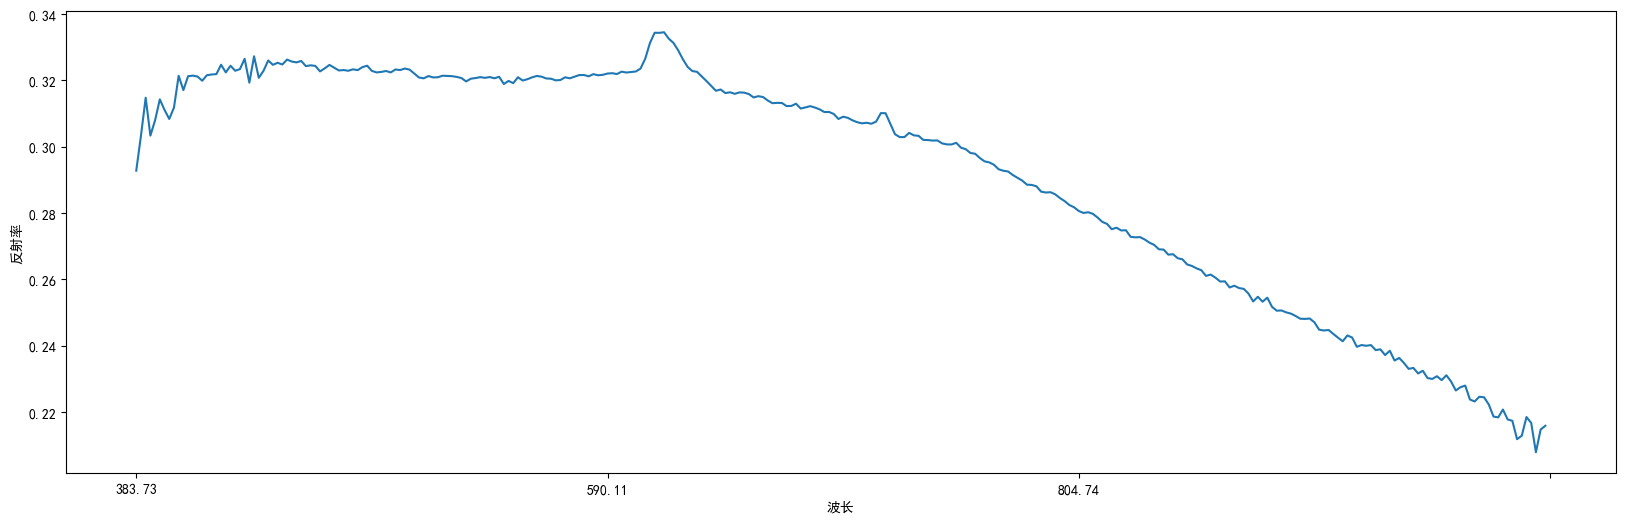

In [ ]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

wave_len = img.metadata['wavelength']

plt.rcParams["figure.figsize"] = (20,6)
fig, axs = plt.subplots()

axs.set_xlabel("波长")
axs.set_ylabel("反射率")
axs.xaxis.set_major_locator(MultipleLocator(100))

# axs.plot(wave_len, img_data[10-5:10+5, 10-5:10+5,:].mean(dim=(0,1)))
axs.plot(wave_len, img_data[750-5:750+5, 500-5:500+5,:].mean(dim=(0,1)))
# axs.plot(wave_len, img_data[750-5:750+5, 600-5:600+5,:].mean(dim=(0,1)))
# axs.plot(wave_len, img_data[750-5:750+5, 700-5:700+5,:].mean(dim=(0,1)))

# axs.plot(wave_len, img_data[800-5:800+5, 300-5:300+5,:].mean(dim=(0,1)))
# axs.plot(wave_len, img_data[800-5:800+5, 400-5:400+5,:].mean(dim=(0,1)))
# axs.plot(wave_len, img_data[800-5:800+5, 500-5:500+5,:].mean(dim=(0,1)))
# axs.plot(wave_len, img_data[800-5:800+5, 600-5:600+5,:].mean(dim=(0,1)))
# axs.plot(wave_len, img_data[800-5:800+5, 700-5:700+5,:].mean(dim=(0,1)))

# axs.plot(wave_len, img_data[900-5:900+5, 300-5:300+5,:].mean(dim=(0,1)))
# axs.plot(wave_len, img_data[900-5:900+5, 400-5:400+5,:].mean(dim=(0,1)))
# axs.plot(wave_len, img_data[900-5:900+5, 500-5:500+5,:].mean(dim=(0,1)))
# axs.plot(wave_len, img_data[900-5:900+5, 600-5:600+5,:].mean(dim=(0,1)))
# axs.plot(wave_len, img_data[900-5:900+5, 700-5:700+5,:].mean(dim=(0,1)))

# axs.plot(wave_len, img_data[1000-5:1000+5, 300-5:300+5,:].mean(dim=(0,1)))
# axs.plot(wave_len, img_data[1000-5:1000+5, 400-5:400+5,:].mean(dim=(0,1)))
# axs.plot(wave_len, img_data[1000-5:1000+5, 500-5:500+5,:].mean(dim=(0,1)))
# axs.plot(wave_len, img_data[1000-5:1000+5, 600-5:600+5,:].mean(dim=(0,1)))
# axs.plot(wave_len, img_data[1000-5:1000+5, 700-5:700+5,:].mean(dim=(0,1)))

# axs.plot(wave_len, img_data[1100-5:1100+5, 300-5:300+5,:].mean(dim=(0,1)))
# axs.plot(wave_len, img_data[1100-5:1100+5, 400-5:400+5,:].mean(dim=(0,1)))
# axs.plot(wave_len, img_data[1100-5:1100+5, 500-5:500+5,:].mean(dim=(0,1)))
# axs.plot(wave_len, img_data[1100-5:1100+5, 600-5:600+5,:].mean(dim=(0,1)))
# axs.plot(wave_len, img_data[1100-5:1100+5, 700-5:700+5,:].mean(dim=(0,1)))

plt.show()
        

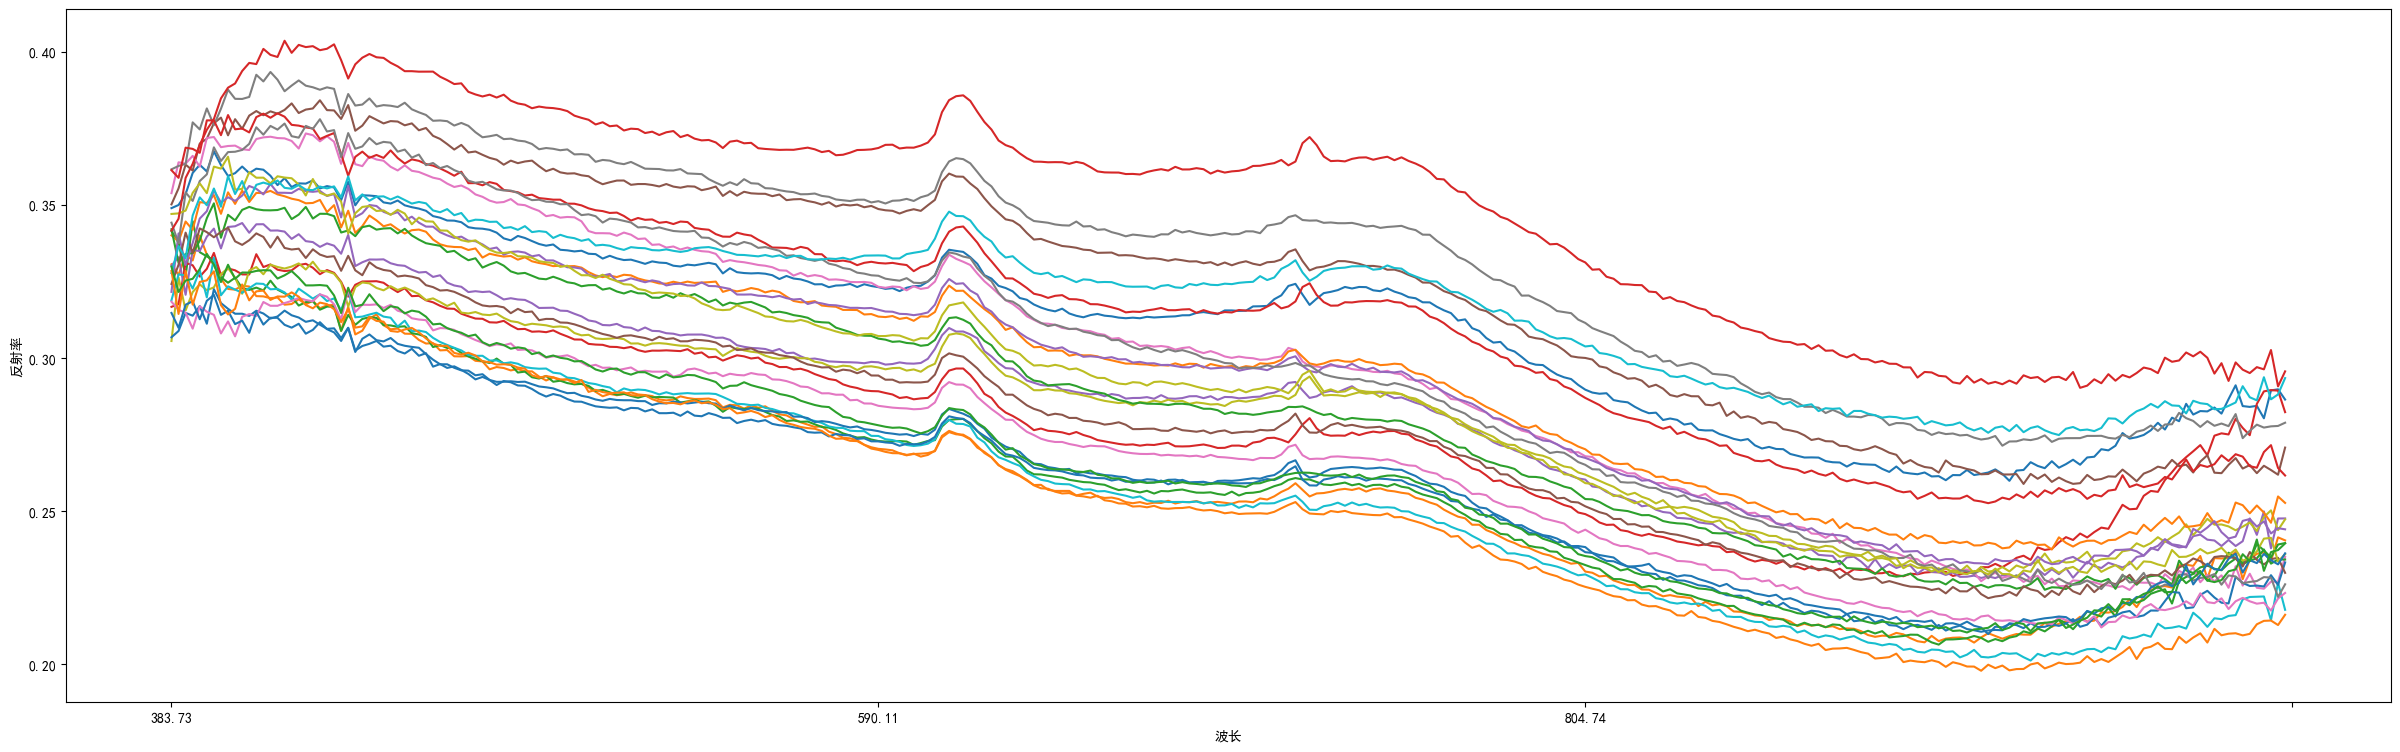

In [ ]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

wave_len = img.metadata['wavelength']

plt.rcParams["figure.figsize"] = (30,9)
fig, axs = plt.subplots()

axs.set_xlabel("波长")
axs.set_ylabel("反射率")
axs.xaxis.set_major_locator(MultipleLocator(100))

axs.plot(wave_len, img_data[150-5:150+5, 400-5:400+5,:].mean(dim=(0,1)))
axs.plot(wave_len, img_data[150-5:150+5, 500-5:500+5,:].mean(dim=(0,1)))
axs.plot(wave_len, img_data[150-5:150+5, 600-5:600+5,:].mean(dim=(0,1)))
axs.plot(wave_len, img_data[150-5:150+5, 700-5:700+5,:].mean(dim=(0,1)))

axs.plot(wave_len, img_data[250-5:250+5, 300-5:300+5,:].mean(dim=(0,1)))
axs.plot(wave_len, img_data[250-5:250+5, 400-5:400+5,:].mean(dim=(0,1)))
axs.plot(wave_len, img_data[250-5:250+5, 500-5:500+5,:].mean(dim=(0,1)))
axs.plot(wave_len, img_data[250-5:250+5, 600-5:600+5,:].mean(dim=(0,1)))
axs.plot(wave_len, img_data[250-5:250+5, 700-5:700+5,:].mean(dim=(0,1)))

axs.plot(wave_len, img_data[350-5:350+5, 300-5:300+5,:].mean(dim=(0,1)))
axs.plot(wave_len, img_data[350-5:350+5, 400-5:400+5,:].mean(dim=(0,1)))
axs.plot(wave_len, img_data[350-5:350+5, 500-5:500+5,:].mean(dim=(0,1)))
axs.plot(wave_len, img_data[350-5:350+5, 600-5:600+5,:].mean(dim=(0,1)))
axs.plot(wave_len, img_data[350-5:350+5, 700-5:700+5,:].mean(dim=(0,1)))

axs.plot(wave_len, img_data[450-5:450+5, 300-5:300+5,:].mean(dim=(0,1)))
axs.plot(wave_len, img_data[450-5:450+5, 400-5:400+5,:].mean(dim=(0,1)))
axs.plot(wave_len, img_data[450-5:450+5, 500-5:500+5,:].mean(dim=(0,1)))
axs.plot(wave_len, img_data[450-5:450+5, 600-5:600+5,:].mean(dim=(0,1)))
axs.plot(wave_len, img_data[450-5:450+5, 700-5:700+5,:].mean(dim=(0,1)))

axs.plot(wave_len, img_data[550-5:550+5, 300-5:300+5,:].mean(dim=(0,1)))
axs.plot(wave_len, img_data[550-5:550+5, 400-5:400+5,:].mean(dim=(0,1)))
axs.plot(wave_len, img_data[550-5:550+5, 500-5:500+5,:].mean(dim=(0,1)))
axs.plot(wave_len, img_data[550-5:550+5, 600-5:600+5,:].mean(dim=(0,1)))
axs.plot(wave_len, img_data[550-5:550+5, 700-5:700+5,:].mean(dim=(0,1)))

plt.show()

# 制作数据集csv文件

In [1]:
import spectral
import pandas as pd
import torch
import os
import numpy as np
import h5py
import ast
from PIL import Image

included_extensions = ['hdr']
data_dir = 'E:\\近红外部分\\spectral_data'
window_size = 3

hdr_files = [fn for fn in os.listdir(data_dir) if any(fn.endswith(ext) for ext in included_extensions)]
mask_rgb_values = [[255,242,0],[34,177,76],[255,0,88]]

from random import sample

spectral.settings.envi_support_nonlowercase_params = True

csv_data = []
data_id = 0
f = h5py.File("spectral_data_IR_winsize{}.hdf5".format(window_size), "w")

for file_name in hdr_files:
    number = file_name.split('-')[0]
    img = spectral.envi.open(data_dir+"/"+file_name)
    gt_TFe = ast.literal_eval(img.metadata['gt_TFe'])
    gt_FeO = ast.literal_eval(img.metadata['gt_FeO'])
    gt_SiO2 = ast.literal_eval(img.metadata['gt_SiO2'])
    gt_F3O4 = ast.literal_eval(img.metadata['gt_F3O4'])
    gt_F2O3 = ast.literal_eval(img.metadata['gt_F2O3'])
    gt_Fe2_plus = ast.literal_eval(img.metadata['gt_Fe2_plus'])
    gt_Fe3_plus = ast.literal_eval(img.metadata['gt_Fe3_plus'])
    gt_Magnetic_rate = ast.literal_eval(img.metadata['gt_Magnetic_rate'])
    img = torch.Tensor(img.asarray()/6000)
    mask = np.array(Image.open(data_dir+"/"+file_name+"_mask.png"))
    r,c,_ = mask.shape


    # 都是他妈PNG，但画图处理后的多了一一个维度，3d画图没有，需要额外判断
    # 跑了俩小时白玩儿
    if mask.shape[2] == 4:
        mask = mask[:,:,:-1]

    # 压缩数据量
    for rgb_idx in range(mask_rgb_values.__len__()):    
        data_id_start = data_id     # sample id Start value

        for row in range(r-window_size+1):
            for col in range(c-window_size+1):
                # A valid window is considered 
                # when the RGB values of the four corners 
                # of the window match a certain category in MASK

                # if col%2==0 or row%2==0:
                #     continue

                if mask[row,col].tolist() == mask_rgb_values[rgb_idx] and \
                        mask[row+window_size-1,col].tolist() == mask_rgb_values[rgb_idx] and \
                        mask[row,col+window_size-1].tolist() == mask_rgb_values[rgb_idx] and \
                        mask[row+window_size-1,col+window_size-1].tolist() == mask_rgb_values[rgb_idx]:
                    sample_id = "{}_{}".format(number,chr(ord('A') + rgb_idx))
                    f.create_dataset(str(data_id), data=img[row:row+window_size,col:col+window_size,:].mean(dim=(0,1)).tolist(), dtype=np.float16)
                    data_id += 1
        if data_id != data_id_start:    # 每张图像样本数量不确定，若该判断不满足不应执行下面操作
            csv_data.append({
                'sample_id': sample_id,
                'dataid_from': str(data_id_start),
                'dataid_to': str(data_id-1),
                'gt_TFe': gt_TFe[rgb_idx],
                'gt_FeO': gt_FeO[rgb_idx],
                'gt_SiO2': gt_SiO2[rgb_idx],
                'gt_F3O4': gt_F3O4[rgb_idx],
                'gt_F2O3': gt_F2O3[rgb_idx],
                'gt_Fe2_plus': gt_Fe2_plus[rgb_idx],
                'gt_Fe3_plus': gt_Fe3_plus[rgb_idx],
                'gt_Magnetic_rate': gt_Magnetic_rate[rgb_idx]
            })
    print("文件‘{}’处理完成".format(file_name))
pd.DataFrame(csv_data, columns=['sample_id','dataid_from','dataid_to','gt_TFe','gt_FeO','gt_SiO2','gt_F3O4','gt_F2O3','gt_Fe2_plus','gt_Fe3_plus','gt_Magnetic_rate']).to_csv("spectral_data_winsize{}.csv".format(window_size))
f.close()

文件‘1-Radiance From Raw Data-Reflectance from Radiance Data and Measured Reference Spectrum.bip.hdr’处理完成
文件‘10-Radiance From Raw Data-Reflectance from Radiance Data and Measured Reference Spectrum.bip.hdr’处理完成
文件‘11-Radiance From Raw Data-Reflectance from Radiance Data and Measured Reference Spectrum.bip.hdr’处理完成
文件‘12-Radiance From Raw Data-Reflectance from Radiance Data and Measured Reference Spectrum.bip.hdr’处理完成
文件‘13-Radiance From Raw Data-Reflectance from Radiance Data and Measured Reference Spectrum.bip.hdr’处理完成
文件‘14-Radiance From Raw Data-Reflectance from Radiance Data and Measured Reference Spectrum.bip.hdr’处理完成
文件‘15-Radiance From Raw Data-Reflectance from Radiance Data and Measured Reference Spectrum.bip.hdr’处理完成
文件‘16-Radiance From Raw Data-Reflectance from Radiance Data and Measured Reference Spectrum.bip.hdr’处理完成
文件‘17-Radiance From Raw Data-Reflectance from Radiance Data and Measured Reference Spectrum.bip.hdr’处理完成
文件‘18-Radiance From Raw Data-Reflectance from Radiance D